In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

#Importing the dataset from drive
m_data = pd.read_csv('/content/gdrive/MyDrive/Dataset/modified_file_1.csv')

m_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Preprocessing
---

In [ ]:
m_data.shape #number of rows and column

(41188, 21)

In [ ]:
yes_count = m_data['y'].value_counts().get('yes', 0)
no_count = m_data['y'].value_counts().get('no', 0)

print(f"Number of 'yes': {yes_count}")
print(f"Number of 'no': {no_count}")

Number of 'yes': 4640
Number of 'no': 36548


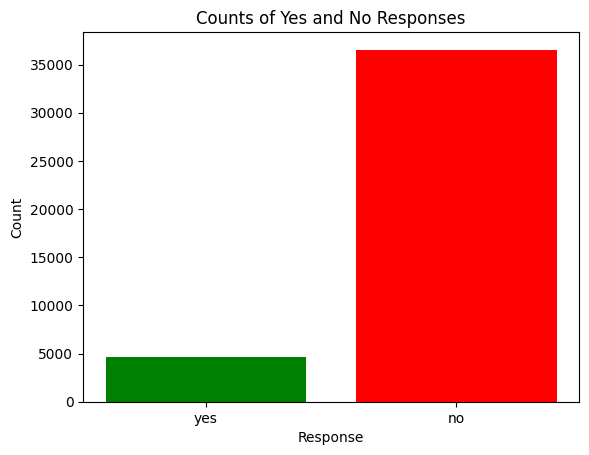

In [ ]:
import matplotlib.pyplot as plt

# Plot
labels = ['yes', 'no']
counts = [yes_count, no_count]

plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Counts of Yes and No Responses')
plt.show()

#Comment: Imbalanced Dataset.


In [ ]:
m_data.isnull().sum()

#Note: Null value is absent on the entire dataset.

# Possible Solutions(IF: null values were present)------->

#1)Dropping Rows [if the amount of missing values were small compared to the dataset]

#2)Imputing Missing values using mean/max strategy of the other data

,0
age,0
job,0
marital,598
education,0
default,0
housing,0
loan,400
contact,549
month,0
day_of_week,300


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

#If there was any null values on the column


# Step 1: Check percentage of missing values per column
null_percent = m_data.isnull().mean() * 100
# print("null_percent",null_percent)

# Step 2: Apply logic: drop or impute
for col in m_data.columns:
    if null_percent[col] > 0:

            if m_data[col].dtype == 'object':
                # Categorical column: impute with mode
                imputer = SimpleImputer(strategy='most_frequent')
            else:
                # Numeric column: impute with median
                imputer = SimpleImputer(strategy='mean')
            m_data[[col]] = imputer.fit_transform(m_data[[col]])



In [ ]:
m_data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


#Faeture Enginnering

In [ ]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Label Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Example dataframe
cols_to_encode = ['job', 'marital', 'education','default','housing','loan','contact','month','day_of_week','poutcome']
encoder = OrdinalEncoder()

# Apply encoding
m_data[cols_to_encode] = encoder.fit_transform(m_data[cols_to_encode])

m_data['y'] = m_data['y'].map({'yes':1,'no':0})

m_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0


# Correlation [Heat Map] - 1

In [ ]:
data_corr = m_data.corr()
data_corr

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,0.007021,-0.024877,-0.017572,...,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,...,-0.006923,-0.028468,0.020965,0.011504,-0.008271,-0.016017,0.052760,-0.007880,-0.019574,0.025122
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,...,-0.007240,-0.037942,0.038689,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199,0.046203
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,...,0.000371,-0.046626,0.038831,0.017009,-0.043778,-0.081607,0.078799,-0.036380,-0.041492,0.057799
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,...,0.032825,0.080062,-0.102416,0.023417,0.203263,0.168073,0.026522,0.195336,0.189845,-0.099352
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,...,-0.011010,-0.010551,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862,0.011552
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,...,0.005166,0.000345,-0.001327,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.003903,-0.004909
contact,0.007021,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,...,0.077368,0.117970,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,-0.024877,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,...,-0.062059,-0.047891,0.103157,-0.065012,-0.178782,-0.004239,0.009652,-0.117264,-0.221425,-0.006065
day_of_week,-0.017572,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,...,-0.038288,-0.009531,-0.004102,0.018732,0.033245,0.005644,0.041465,0.039043,0.028380,0.015967


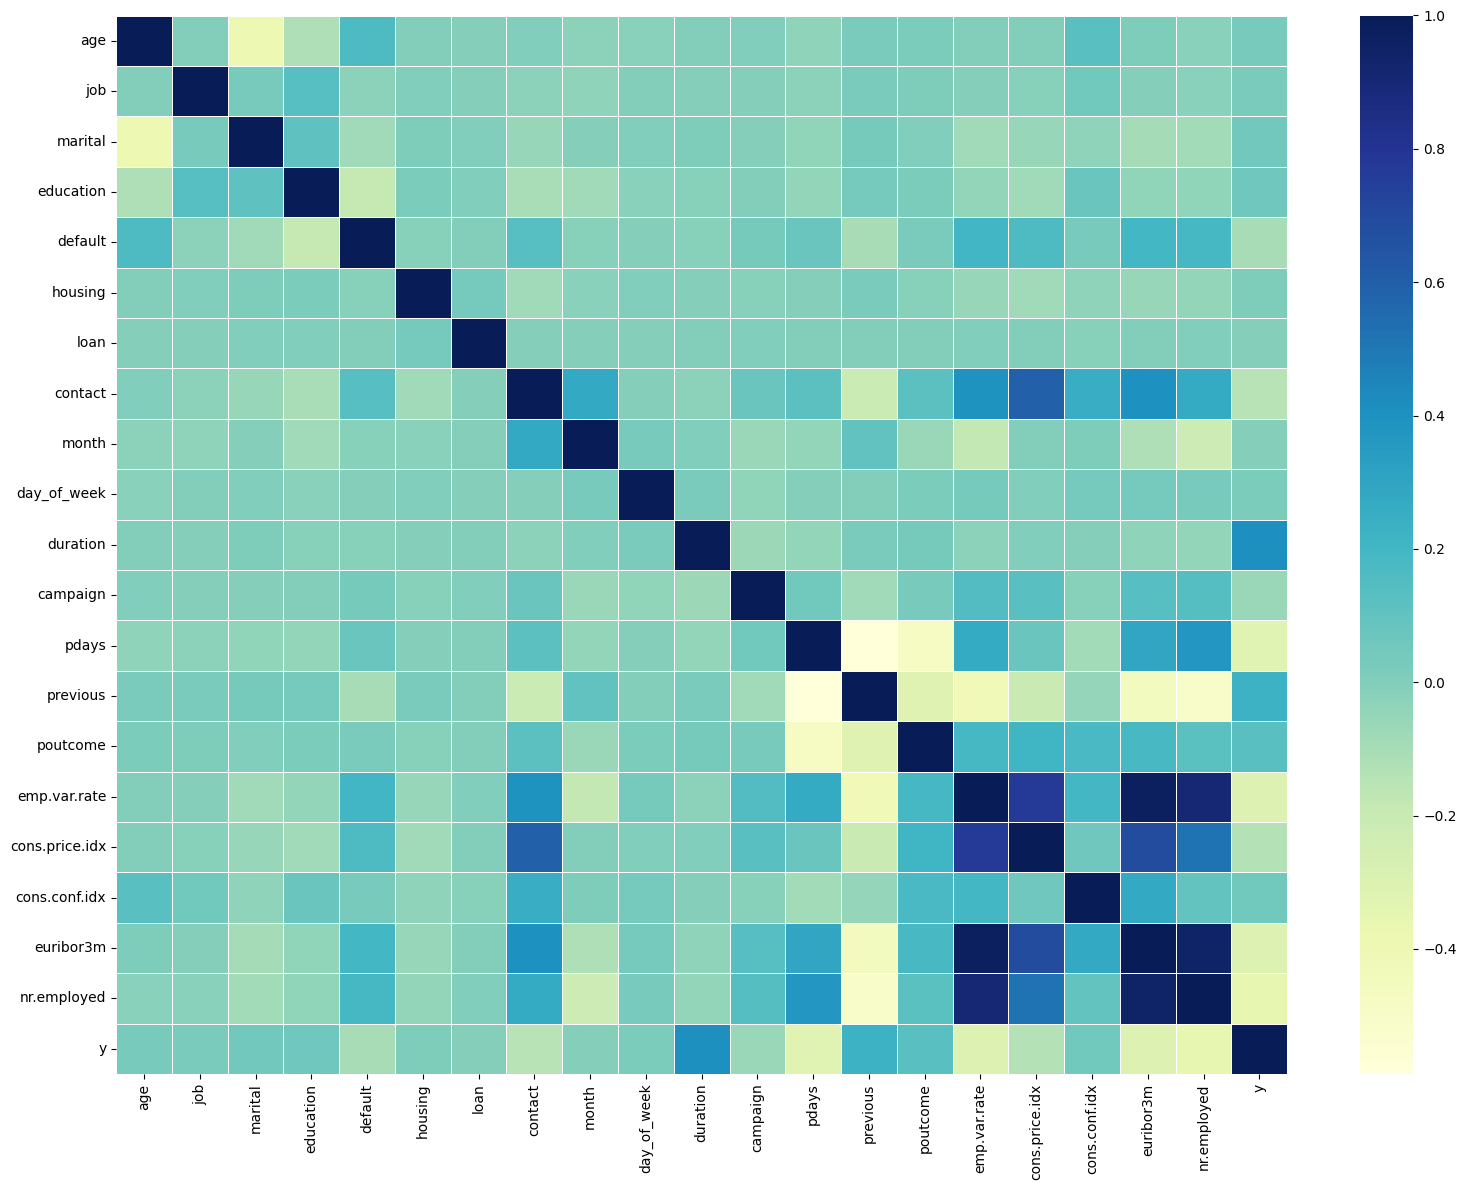

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(data_corr, cmap = 'YlGnBu',linewidths=0.5)
plt.tight_layout()
plt.show()

# Drop Columns

In [ ]:
to_drop = ['cons.price.idx','euribor3m']

In [ ]:
m_data = m_data.drop(to_drop, axis=1)

In [ ]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            41188 non-null  int64  
 1   job            41188 non-null  float64
 2   marital        41188 non-null  float64
 3   education      41188 non-null  float64
 4   default        41188 non-null  float64
 5   housing        41188 non-null  float64
 6   loan           41188 non-null  float64
 7   contact        41188 non-null  float64
 8   month          41188 non-null  float64
 9   day_of_week    41188 non-null  float64
 10  duration       41188 non-null  int64  
 11  campaign       41188 non-null  int64  
 12  pdays          41188 non-null  int64  
 13  previous       41188 non-null  int64  
 14  poutcome       41188 non-null  float64
 15  emp.var.rate   41188 non-null  float64
 16  cons.conf.idx  41188 non-null  float64
 17  nr.employed    41188 non-null  float64
 18  y     

# One Hot Encoding

In [ ]:
m_data['month'].unique()
m_data['day_of_week'].unique()
m_data['job'].unique()
m_data['marital'].unique()
m_data['default'].unique()
m_data['housing'].unique()
m_data['contact'].unique()
m_data['poutcome'].unique()
m_data['pdays'].unique() #Integer type
m_data['y'].unique()

array([0, 1])

In [ ]:
m_data_encoded = pd.get_dummies(m_data, columns=['job', 'marital', 'education','default','housing','loan','contact','month','day_of_week','poutcome'], drop_first=True)

# m_data_encoded['y'] = m_data_encoded['y'].map({'yes':1,'no':0})

y_col = m_data_encoded['y']

m_data_encoded = m_data_encoded.drop('y', axis=1)

bool_col = m_data_encoded.select_dtypes(include='bool').columns
m_data_encoded[bool_col] = m_data_encoded[bool_col].astype(int)

m_data_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,nr.employed,job_1.0,job_2.0,...,month_6.0,month_7.0,month_8.0,month_9.0,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,poutcome_1.0,poutcome_2.0
0,56,261,1,999,0,1.1,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
y_col

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [ ]:
m_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 51 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   duration         41188 non-null  int64  
 2   campaign         41188 non-null  int64  
 3   pdays            41188 non-null  int64  
 4   previous         41188 non-null  int64  
 5   emp.var.rate     41188 non-null  float64
 6   cons.conf.idx    41188 non-null  float64
 7   nr.employed      41188 non-null  float64
 8   job_1.0          41188 non-null  int64  
 9   job_2.0          41188 non-null  int64  
 10  job_3.0          41188 non-null  int64  
 11  job_4.0          41188 non-null  int64  
 12  job_5.0          41188 non-null  int64  
 13  job_6.0          41188 non-null  int64  
 14  job_7.0          41188 non-null  int64  
 15  job_8.0          41188 non-null  int64  
 16  job_9.0          41188 non-null  int64  
 17  job_10.0    

# Correlation [Heat Map]-2

In [ ]:
data_corr = m_data_encoded.corr()
data_corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,nr.employed,job_1.0,job_2.0,...,month_6.0,month_7.0,month_8.0,month_9.0,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,poutcome_1.0,poutcome_2.0
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.129372,-0.017725,-0.024191,0.031213,...,-0.067523,0.030045,0.053008,0.040889,0.019027,-0.021356,0.019137,-0.023671,-0.016376,0.035626
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,-0.008173,-0.044703,0.012992,0.003679,...,0.008054,-0.015941,0.015454,0.018011,-0.023068,0.014666,0.004140,0.014537,-0.011665,0.044876
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,-0.013733,0.144095,-0.001775,-0.002203,...,-0.032704,-0.079028,-0.049126,-0.033953,0.014405,0.005141,-0.025125,-0.021088,0.087645,-0.050893
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,-0.091342,0.372605,0.065335,0.019246,...,0.070690,-0.016946,-0.128677,-0.154629,0.001031,-0.008186,-0.007300,0.001021,0.491353,-0.950700
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.050936,-0.501333,-0.054845,-0.013239,...,-0.012534,0.081050,0.127754,0.157651,-0.002012,0.001512,0.000090,-0.003929,-0.878776,0.524045
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.196041,0.906970,0.057264,0.009363,...,-0.111356,-0.105917,-0.213706,-0.170366,-0.018139,-0.007673,0.014582,0.026797,0.472501,-0.256886
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,1.000000,0.100513,-0.101567,-0.032306,...,-0.011740,-0.052892,0.170425,0.169175,-0.041382,-0.027877,0.050033,0.023711,0.099724,0.084824
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.100513,1.000000,0.063921,0.024581,...,-0.171782,0.027593,-0.273236,-0.292156,-0.017433,-0.002658,0.009923,0.023272,0.493051,-0.350613
job_1.0,-0.024191,0.012992,-0.001775,0.065335,-0.054845,0.057264,-0.101567,0.063921,1.000000,-0.103050,...,0.136311,-0.062053,-0.049034,-0.054309,-0.009754,-0.007062,-0.006829,0.020673,0.043843,-0.061403
job_2.0,0.031213,0.003679,-0.002203,0.019246,-0.013239,0.009363,-0.032306,0.024581,-0.103050,1.000000,...,-0.000762,0.054461,-0.010429,-0.009172,0.006828,0.005551,-0.007275,-0.003480,0.007598,-0.017238


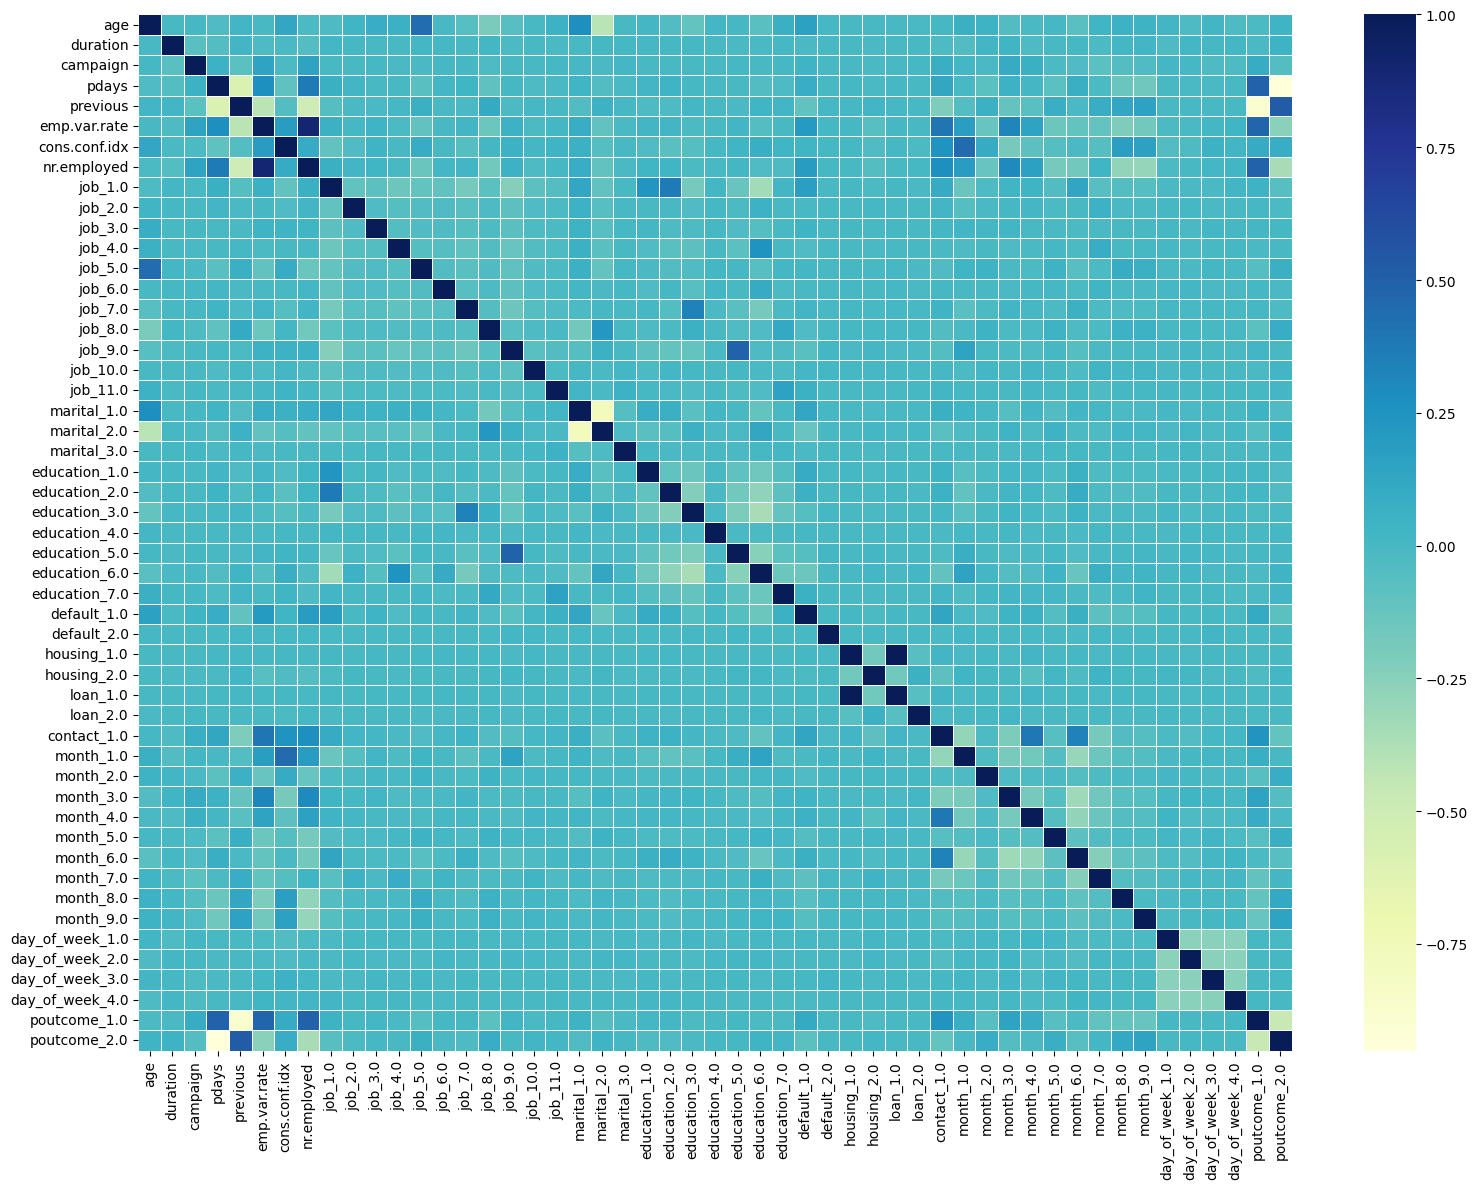

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(data_corr, cmap = 'YlGnBu',linewidths=0.5)
plt.tight_layout()
plt.show()

In [ ]:
m_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 51 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   duration         41188 non-null  int64  
 2   campaign         41188 non-null  int64  
 3   pdays            41188 non-null  int64  
 4   previous         41188 non-null  int64  
 5   emp.var.rate     41188 non-null  float64
 6   cons.conf.idx    41188 non-null  float64
 7   nr.employed      41188 non-null  float64
 8   job_1.0          41188 non-null  int64  
 9   job_2.0          41188 non-null  int64  
 10  job_3.0          41188 non-null  int64  
 11  job_4.0          41188 non-null  int64  
 12  job_5.0          41188 non-null  int64  
 13  job_6.0          41188 non-null  int64  
 14  job_7.0          41188 non-null  int64  
 15  job_8.0          41188 non-null  int64  
 16  job_9.0          41188 non-null  int64  
 17  job_10.0    

# Drop Columns - 2

In [ ]:
to_drop2 = ['nr.employed']

m_data_encoded = m_data_encoded.drop(to_drop2, axis=1)

m_data_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   duration         41188 non-null  int64  
 2   campaign         41188 non-null  int64  
 3   pdays            41188 non-null  int64  
 4   previous         41188 non-null  int64  
 5   emp.var.rate     41188 non-null  float64
 6   cons.conf.idx    41188 non-null  float64
 7   job_1.0          41188 non-null  int64  
 8   job_2.0          41188 non-null  int64  
 9   job_3.0          41188 non-null  int64  
 10  job_4.0          41188 non-null  int64  
 11  job_5.0          41188 non-null  int64  
 12  job_6.0          41188 non-null  int64  
 13  job_7.0          41188 non-null  int64  
 14  job_8.0          41188 non-null  int64  
 15  job_9.0          41188 non-null  int64  
 16  job_10.0         41188 non-null  int64  
 17  job_11.0    

# Splitting the Dataset

---

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting the dataset---------------->

X = m_data_encoded
y = y_col

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)

zero_count = (y_test == 0).sum()
print(f"Number of 0s in y_col: {zero_count}")

(28831, 50)
(12357, 50)
Number of 0s in y_col: 10969


# Feature Scaling
---

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)

# transform test data
X_test_scaled = scaler.transform(X_test)

# Model Training-->

---
---

# Neural Network
---


Setting up the Libraries

In [ ]:
import numpy as np

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# Create the model
model_neural = Sequential([
    Dense(64, activation='relu', input_shape=(50,)),   # 49 input features
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')                     # Sigmoid for binary classification
])

# Compile the model
model_neural.compile(optimizer=Adam(0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model_neural.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Get predicted probabilities from the neural network
y_pred_neural_prob = model_neural.predict(X_test_scaled)

# Convert probabilities to class labels (0 or 1)
y_pred_neural = (y_pred_neural_prob > 0.5).astype(int)


# Evaluate the model
loss, neural_accuracy = model_neural.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {neural_accuracy:.4f}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


361/361 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7518 - loss: 0.5629 - val_accuracy: 0.8937 - val_loss: 0.3140
Epoch 2/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8839 - loss: 0.3262 - val_accuracy: 0.8937 - val_loss: 0.2913
Epoch 3/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8917 - loss: 0.2985 - val_accuracy: 0.9017 - val_loss: 0.2775
Epoch 4/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8935 - loss: 0.2986 - val_accuracy: 0.9050 - val_loss: 0.2672
Epoch 5/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8958 - loss: 0.2880 - val_accuracy: 0.9069 - val_loss: 0.2611
Epoch 6/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8977 - loss: 0.2809 - val_accuracy: 0.9065 - val_loss: 0.2549
Epoch 7/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8930 - loss: 0.2817 - val_accuracy: 0.9069 - val_loss: 0.2492
Epoch 8/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8985 - loss: 0.2637 - val_accuracy: 0.90

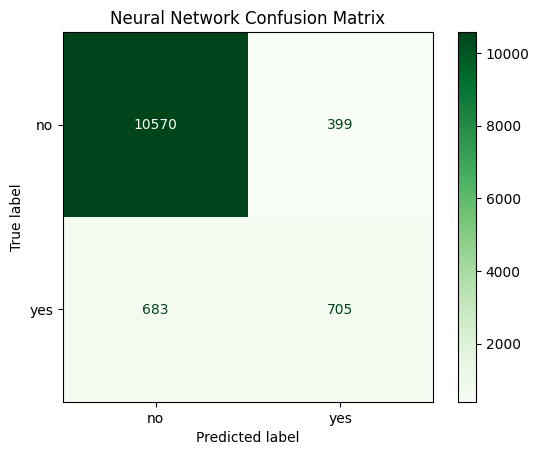

In [ ]:
# Neural Network
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred_neural)
ConfusionMatrixDisplay(conf_mat, display_labels=["no", "yes"]).plot(cmap="Greens")
plt.title("Neural Network Confusion Matrix")
plt.show()

# Precision, Recall, F1

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_neural_n = precision_score(y_test, y_pred_neural,pos_label=0)   # assuming 'no' is the positive class

recall_neural_n = recall_score(y_test, y_pred_neural,pos_label=0)

f1_neural_n = f1_score(y_test, y_pred_neural, pos_label=0)

precision_neural_y = precision_score(y_test, y_pred_neural,pos_label=1)   # assuming 'yes' is the negative class

recall_neural_y = recall_score(y_test, y_pred_neural,pos_label=1)

f1_neural_y = f1_score(y_test, y_pred_neural, pos_label=1)

print("Precision Yes:", precision_neural_y, "Precision No:",precision_neural_n)
print("Recall Yes:", recall_neural_y, "Recall No:",recall_neural_n)
print("F1 Score Yes:", f1_neural_y,"F1 Score No:",f1_neural_n)

Precision Yes: 0.6385869565217391 Precision No: 0.9393050742024349
Recall Yes: 0.5079250720461095 Recall No: 0.9636247606892151
F1 Score Yes: 0.5658105939004815 F1 Score No: 0.9513095130951309


In [ ]:
from sklearn.metrics import classification_report

print("Neural Network:")
print(classification_report(y_test, y_pred_neural, target_names=["no", "yes"]))

Neural Network:
              precision    recall  f1-score   support

          no       0.94      0.96      0.95     10969
         yes       0.64      0.51      0.57      1388

    accuracy                           0.91     12357
   macro avg       0.79      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357



# Random Forest Classifier

---

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Using random forest classifier

ran_for = RandomForestClassifier()
ran_for.fit(X_train_scaled, y_train)
y_pred_rf = ran_for.predict(X_test_scaled)


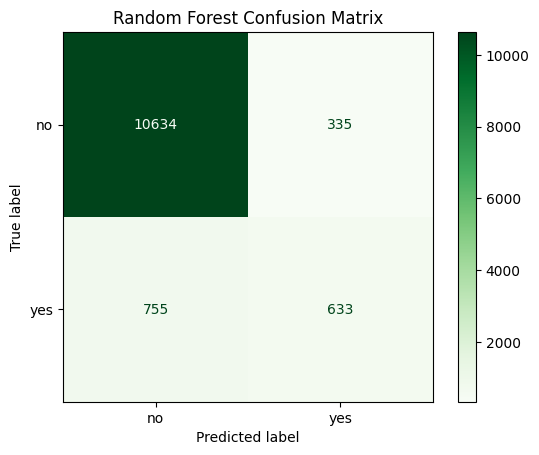


Random Forest Accuracy score: 0.9117908877559278


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt


# Random Forest
conf_mat = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(conf_mat, display_labels=["no", "yes"]).plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Accuracy score
print()

ran_for_accuracy = accuracy_score(y_test, y_pred_rf) # Random Accuracy

print("Random Forest Accuracy score:", accuracy_score(y_test, y_pred_rf))

# Precision, Recall, F1 Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_rf_n = precision_score(y_test, y_pred_rf,pos_label=0)   # assuming 'no' is the positive class

recall_rf_n = recall_score(y_test, y_pred_rf,pos_label=0)

f1_rf_n = f1_score(y_test, y_pred_rf, pos_label=0)

precision_rf_y = precision_score(y_test, y_pred_rf,pos_label=1)   # assuming 'yes' is the negative class

recall_rf_y = recall_score(y_test, y_pred_rf,pos_label=1)

f1_rf_y = f1_score(y_test, y_pred_rf, pos_label=1)

print("Precision Yes:", precision_rf_y, "Precision No:",precision_rf_n)
print("Recall Yes:", recall_rf_y, "Recall No:",recall_rf_n)
print("F1 Score Yes:", f1_rf_y,"F1 Score No:",f1_rf_n)

Precision Yes: 0.6539256198347108 Precision No: 0.9337079638247432
Recall Yes: 0.45605187319884727 Recall No: 0.9694593855410703
F1 Score Yes: 0.5373514431239389 F1 Score No: 0.9512478754808122


In [ ]:
from sklearn.metrics import classification_report

print("Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=["no", "yes"]))

Random Forest:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     10969
         yes       0.65      0.46      0.54      1388

    accuracy                           0.91     12357
   macro avg       0.79      0.71      0.74     12357
weighted avg       0.90      0.91      0.90     12357



# Logistic Regression

---

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)


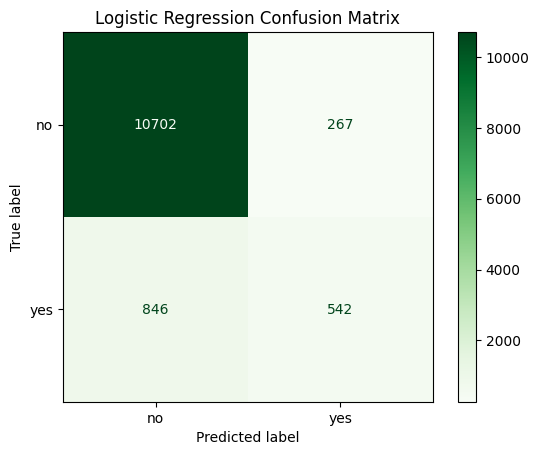


Logistic Regression Accuracy score: 0.9099295945617868


In [ ]:
# Logistic Regression
conf_mat = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(conf_mat, display_labels=["no", "yes"]).plot(cmap="Greens")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Accuracy score
print()

logistic_accuracy = accuracy_score(y_test, y_pred_log) # Logistic Regression Accuracy

print("Logistic Regression Accuracy score:", accuracy_score(y_test, y_pred_log))

# Precision, Recall, F1

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_log_n = precision_score(y_test, y_pred_log,pos_label=0)   # assuming 'no' is the positive class

recall_log_n = recall_score(y_test, y_pred_log,pos_label=0)

f1_log_n = f1_score(y_test, y_pred_log, pos_label=0)

precision_log_y = precision_score(y_test, y_pred_log,pos_label=1)   # assuming 'yes' is the negative class

recall_log_y = recall_score(y_test, y_pred_log,pos_label=1)

f1_log_y = f1_score(y_test, y_pred_log, pos_label=1)


print("Precision Yes:", precision_log_y, "Precision No:",precision_log_n)
print("Recall Yes:", recall_log_y, "Recall No:",recall_log_n)
print("F1 Score Yes:", f1_log_y,"F1 Score No:",f1_log_n)

Precision Yes: 0.6699629171817059 Precision No: 0.9267405611361275
Recall Yes: 0.3904899135446686 Recall No: 0.9756586744461665
F1 Score Yes: 0.49340009103322713 F1 Score No: 0.950570679930719


In [ ]:
from sklearn.metrics import classification_report

print("Logistic Regression:")
print(classification_report(y_test, y_pred_log, target_names=["no", "yes"]))

Logistic Regression:
              precision    recall  f1-score   support

          no       0.93      0.98      0.95     10969
         yes       0.67      0.39      0.49      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357



# Comparison

----


ROC & AUC Curve

387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


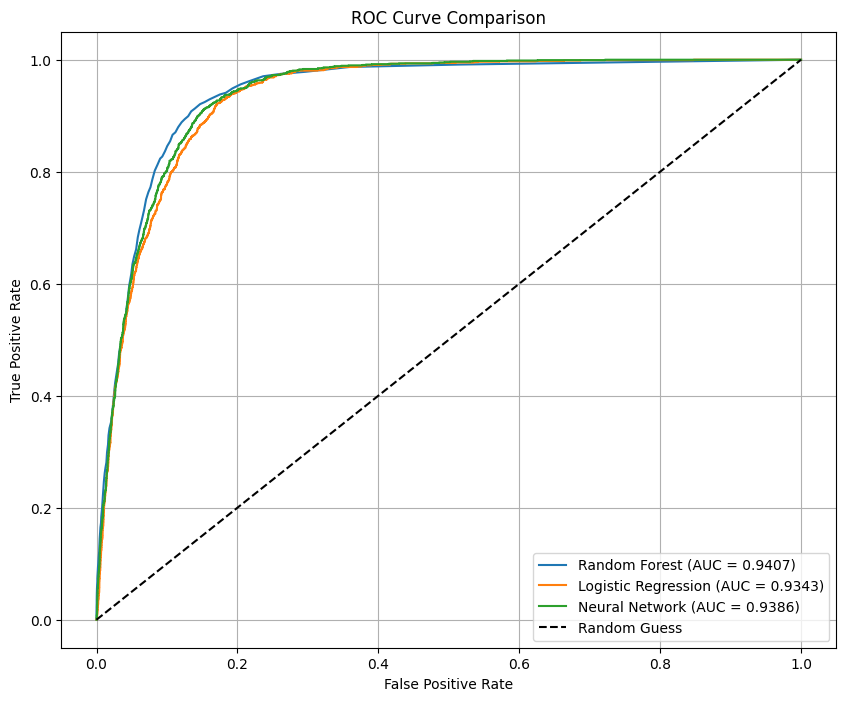

In [ ]:
plt.figure(figsize=(10, 8))

# Random Forest
y_probs_rf = ran_for.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.4f})")

# Logistic Regression
y_probs_log = log_model.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_probs_log)
roc_auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.4f})")

# Neural Network
y_probs_nn = model_neural.predict(X_test_scaled)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_probs_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_nn:.4f})")

# Plot random line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Final plot setup
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Accuracy Score Comparison

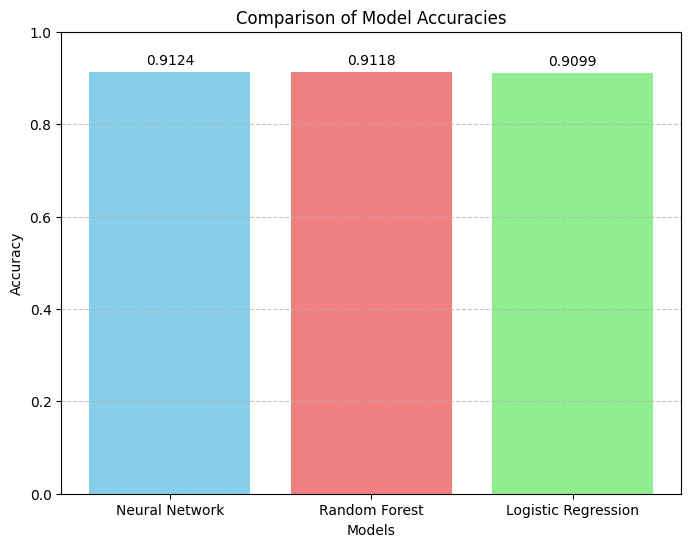

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
models = ['Neural Network', 'Random Forest', 'Logistic Regression']
accuracy_scores = [neural_accuracy, ran_for_accuracy, logistic_accuracy]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Add value labels above each bar
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom', fontsize=10)

plt.show()

Precision Score Comparison

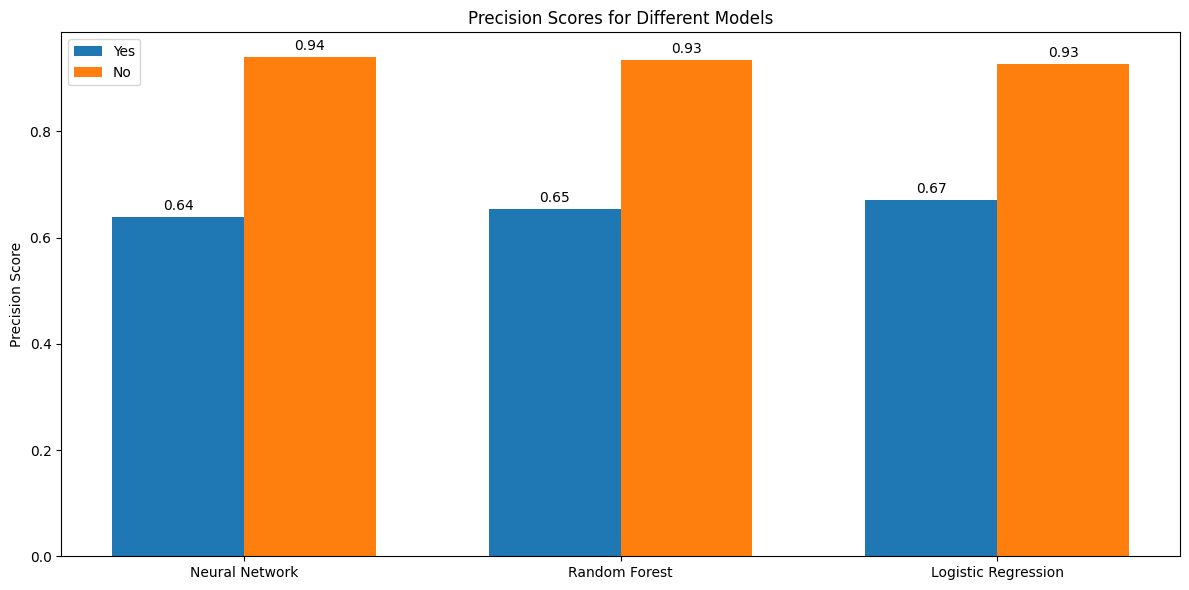

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained your models (neural network, random forest, logistic regression)
# and have y_pred for each model as y_pred_neural, y_pred_rf, y_pred_log, and y_test

# Calculate precision scores for each model and class (yes/no)
precision_neural_yes = precision_score(y_test, y_pred_neural, pos_label=1)
precision_neural_no = precision_score(y_test, y_pred_neural, pos_label=0)
precision_rf_yes = precision_score(y_test, y_pred_rf, pos_label=1)
precision_rf_no = precision_score(y_test, y_pred_rf, pos_label=0)
precision_log_yes = precision_score(y_test, y_pred_log, pos_label=1)
precision_log_no = precision_score(y_test, y_pred_log, pos_label=0)


models = ['Neural Network', 'Random Forest', 'Logistic Regression']
precision_yes = [precision_neural_yes, precision_rf_yes, precision_log_yes]
precision_no = [precision_neural_no, precision_rf_no, precision_log_no]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, precision_yes, width, label='Yes')
rects2 = ax.bar(x + width/2, precision_no, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precision Score')
ax.set_title('Precision Scores for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to add value labels above each bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

Recall Score Comparison

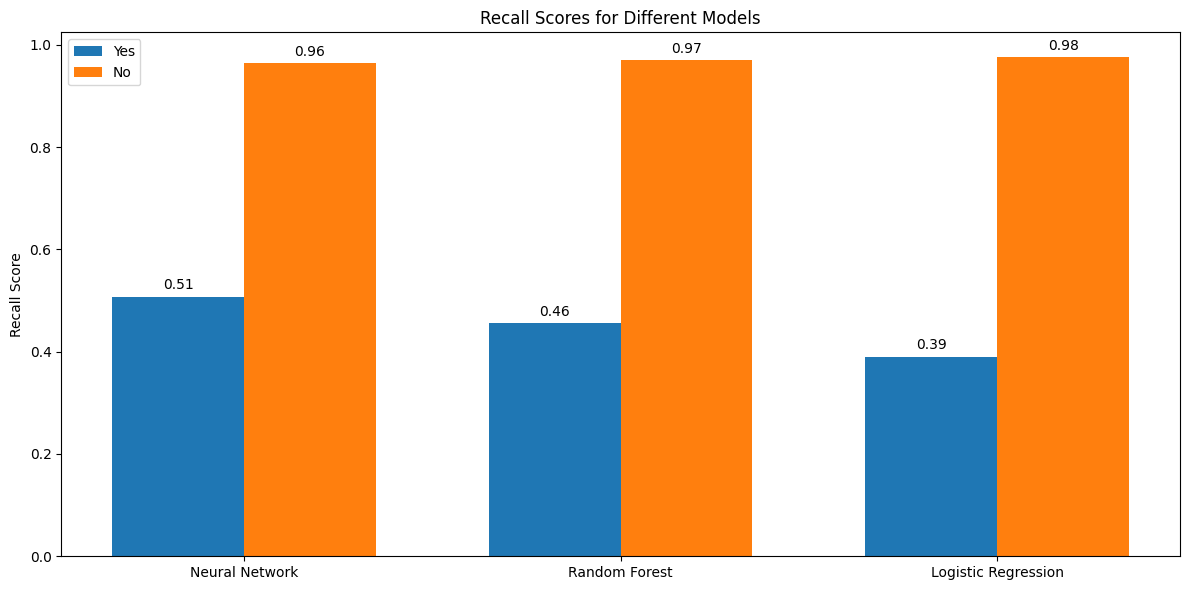

In [ ]:
recall_neural_yes = recall_score(y_test, y_pred_neural, pos_label=1)
recall_neural_no = recall_score(y_test, y_pred_neural, pos_label=0)
recall_rf_yes = recall_score(y_test, y_pred_rf, pos_label=1)
recall_rf_no = recall_score(y_test, y_pred_rf, pos_label=0)
recall_log_yes = recall_score(y_test, y_pred_log, pos_label=1)
recall_log_no = recall_score(y_test, y_pred_log, pos_label=0)

models = ['Neural Network', 'Random Forest', 'Logistic Regression']
recall_yes = [recall_neural_yes, recall_rf_yes, recall_log_yes]
recall_no = [recall_neural_no, recall_rf_no, recall_log_no]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, recall_yes, width, label='Yes')
rects2 = ax.bar(x + width/2, recall_no, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Recall Score')
ax.set_title('Recall Scores for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()
